In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.func.support_functions import *

## Data import and manipulation

In [2]:
#Import Schizophrenia data
shizophrenia_p, shizophrenia_c = load_data()

## Full activity time series 

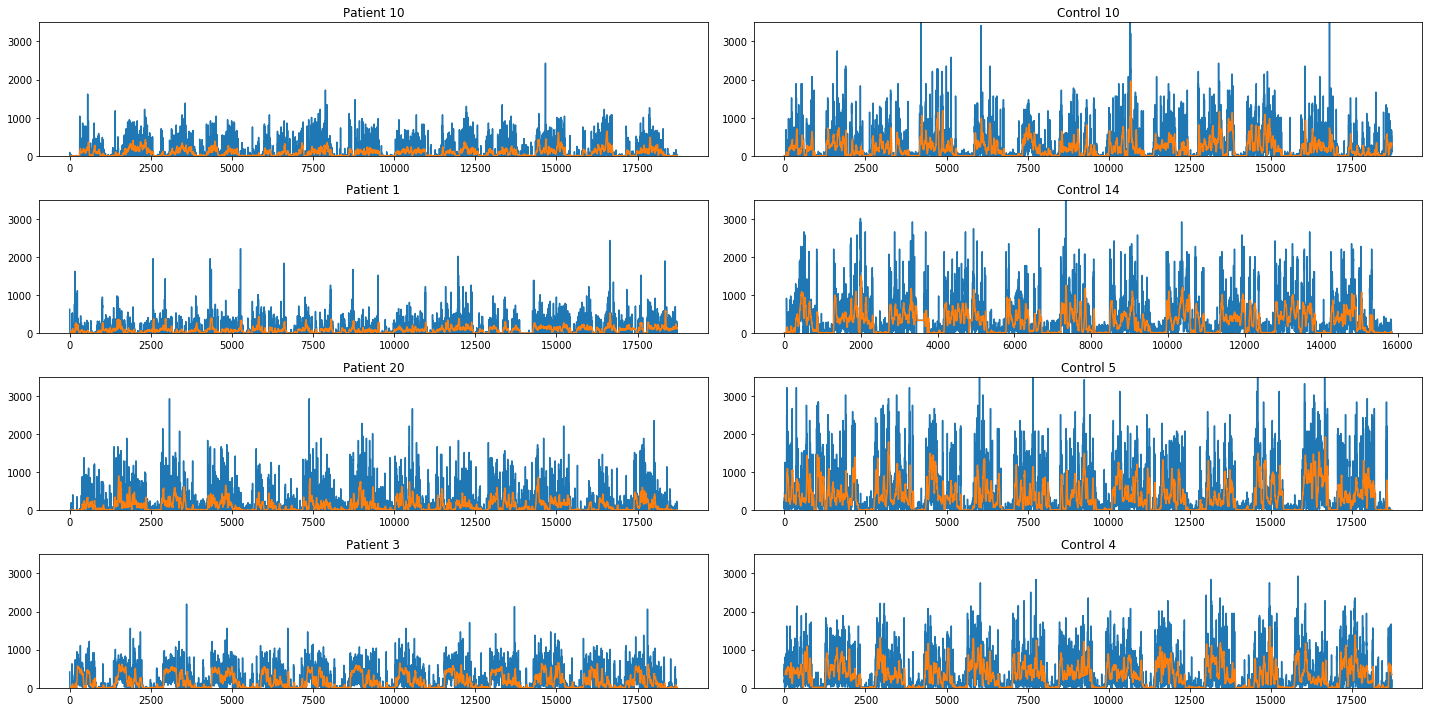

In [13]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.plot(shizophrenia_p[10])
ax0.plot(shizophrenia_p[10].rolling(window=30).mean())
ax0.set_ylim([0,3500])
ax0.set_title('Patient 10')
ax1.plot(shizophrenia_c[10])
ax1.plot(shizophrenia_c[10].rolling(window=30).mean())
ax1.set_ylim([0,3500])
ax1.set_title('Control 10')
ax2.plot(shizophrenia_p[1])
ax2.plot(shizophrenia_p[1].rolling(window=30).mean())
ax2.set_ylim([0,3500])
ax2.set_title('Patient 1')
ax3.plot(shizophrenia_c[14])
ax3.plot(shizophrenia_c[14].rolling(window=30).mean())
ax3.set_ylim([0,3500])
ax3.set_title('Control 14')
ax4.plot(shizophrenia_p[20])
ax4.plot(shizophrenia_p[20].rolling(window=30).mean())
ax4.set_ylim([0,3500])
ax4.set_title('Patient 20')
ax5.plot(shizophrenia_c[5])
ax5.plot(shizophrenia_c[5].rolling(window=30).mean())
ax5.set_ylim([0,3500])
ax5.set_title('Control 5')
ax6.plot(shizophrenia_p[3])
ax6.plot(shizophrenia_p[3].rolling(window=30).mean())
ax6.set_ylim([0,3500])
ax6.set_title('Patient 3')
ax7.plot(shizophrenia_c[4])
ax7.plot(shizophrenia_c[4].rolling(window=30).mean())
ax7.set_ylim([0,3500])
ax7.set_title('Control 4')
fig.tight_layout()

Figure 1 shows patients data on the left side and data of the control group on the right side.
The data was recorded over arround 14 days per person. The data reveals the circadian rhythm of a person. The periods in which a person is active or awake appear as blocks. The periods between the blocks are seen as resting periods. They have a lower mean value and lower variance and they appear to be shorter in time than the active periods. These observations match with known human behavior. The time a persons is asleep is with 6-8 hours (source) shorter than the time she is awake. 
The transition between these to periods appear quite instantly. As soon as a person lays down to rest or sleep, one reduce movements or even lays still for several minutes. 
Thus, there is a abrupt change of mean and variance in time, which might indicate heteroscedasticity. 
Heteroscedasticity will be analysed at a later stage.

The circadian cycles one can observe here is of course affected by a day and night rhythm, as this comes with social norms but can of course differ from person to person. In conclusion, the time series follows most certainly some sort of seasonality. 

A first visual comparison shows a difference in the scale. The control group appears overall more active than the patients.
This will be further investigated when comparing the overall means of the time series. But the difference in scale appears to be mostly during the active periods. 

Furthermore, the control groups seems to vary more in activity during their active periods, while the patients seem to vary more over the whole time. 

It can be observed, that the control groups seems to stick more to a rest-active cycle than the patients. 
It is easier to see, when a patient is resting or active or when the person went to bed. The patients don't seem to stick to this cycle. Especially patient 10 and patient 1 have a very low average activity with little change between day and night.
This observation might fit to the diagnosed characteristics of patients with a schizophrenic condition. The patient show a disturbed circadian cycle and behavioral abnormalilites. 

#### Key statements: 
* general description of the data, like varying variance, seasonality, heteroscedasticity
* First visual differences between patients and control like:
* lower mean activity 
* Disturbed circadian cycle  


### Comparison of mean activity

In [63]:
from sklearn.utils import resample
means_p = np.array([np.mean(shizophrenia_p[i]) for i in range(0,len(shizophrenia_p))])
means_c = np.array([np.mean(shizophrenia_c[i]) for i in range(0,len(shizophrenia_c))])
boot_p = resample(means_p, replace = True, n_samples = 100, random_state=0 )
boot_c = resample(means_c, replace = True, n_samples = 100, random_state=0 )
var_p = np.array([np.var(shizophrenia_p[i]) for i in range(0,len(shizophrenia_p))])
var_c = np.array([np.var(shizophrenia_c[i]) for i in range(0,len(shizophrenia_c))])
boot_var_p = resample(var_p, replace = True, n_samples = 100, random_state=0 )
boot_var_c = resample(var_c, replace = True, n_samples = 100, random_state=0 )

Text(0.5,1,'Histogram of bootstrapped variance of time series')

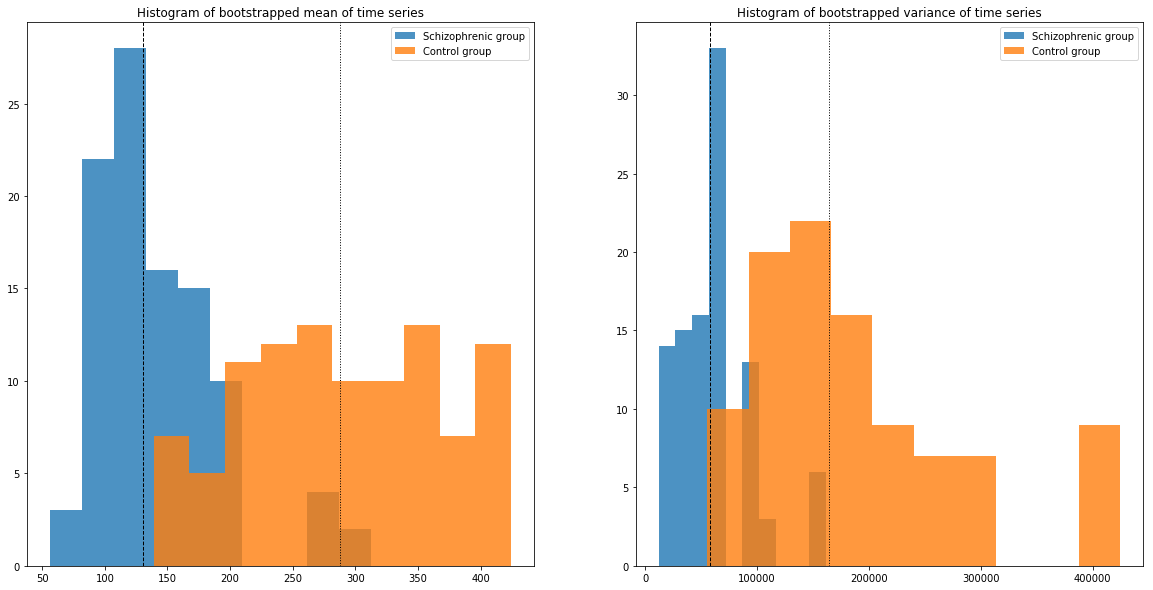

In [68]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.hist(boot_p, alpha=0.8,bins= 10 ,label = 'Schizophrenic group') 
ax0.hist(boot_c, alpha=0.8,bins= 10 ,label = 'Control group') 
ax0.axvline(np.median(boot_p), color='k', linestyle='dashed', linewidth=1)
ax0.axvline(np.median(boot_c), color='k', linestyle='dotted', linewidth=1)
ax0.legend()
ax0.set_title("Histogram of bootstrapped mean of time series") 

ax1.hist(boot_var_p, alpha=0.8,bins= 10 ,label = 'Schizophrenic group') 
ax1.hist(boot_var_c, alpha=0.8,bins= 10 ,label = 'Control group') 
ax1.axvline(np.median(boot_var_p), color='k', linestyle='dashed', linewidth=1)
ax1.axvline(np.median(boot_var_c), color='k', linestyle= 'dotted', linewidth=1)
ax1.legend()
ax1.set_title("Histogram of bootstrapped variance of time series") 


Figure 2 shows a two histograms of the overall sample mean and the sample variance of each time series. To improve the parameter estimate, bootstrapping was applied to increase the sample size from 22 and 32 from the schizophrenic and control group to 50, respectively. 
The histograms show that the control group has indeed a higher overall mean and variance of activity than the schizophrenic group. 
As we can see there is already a difference in the first to moments of the two groups. In the following, the sample distribution of the data is analyzed. 
According to the histograms, the two groups are indeed generated by different distributions, but this has to be further investigated by analysing the daily and nightly structure of the data. Moreover it is up to analyse how the time series are distributed, and if the active and resting period are also generated by different distributions. 
REWRITE!
#### Key statement
* schizophrenic and control group most likely generated by different distribution, classification possible 

## Analysis of the sample distribution of the time series

To get a better understanding of the underlying distribution of the time series, its sample distributions are analyzed. 
The time series is non negative, since the activity itself cannot be negative. This natural property of the data could possibly restrict a sample distribution. 
The sensor measure the activity averaged over 60 seconds. Not clear how the sensor measure only little movements? 
More! 

Maybe rectified Gaussian Distributed, indicated by the differenciated version, that we can assume a normal distribution? Maybe more indicators?

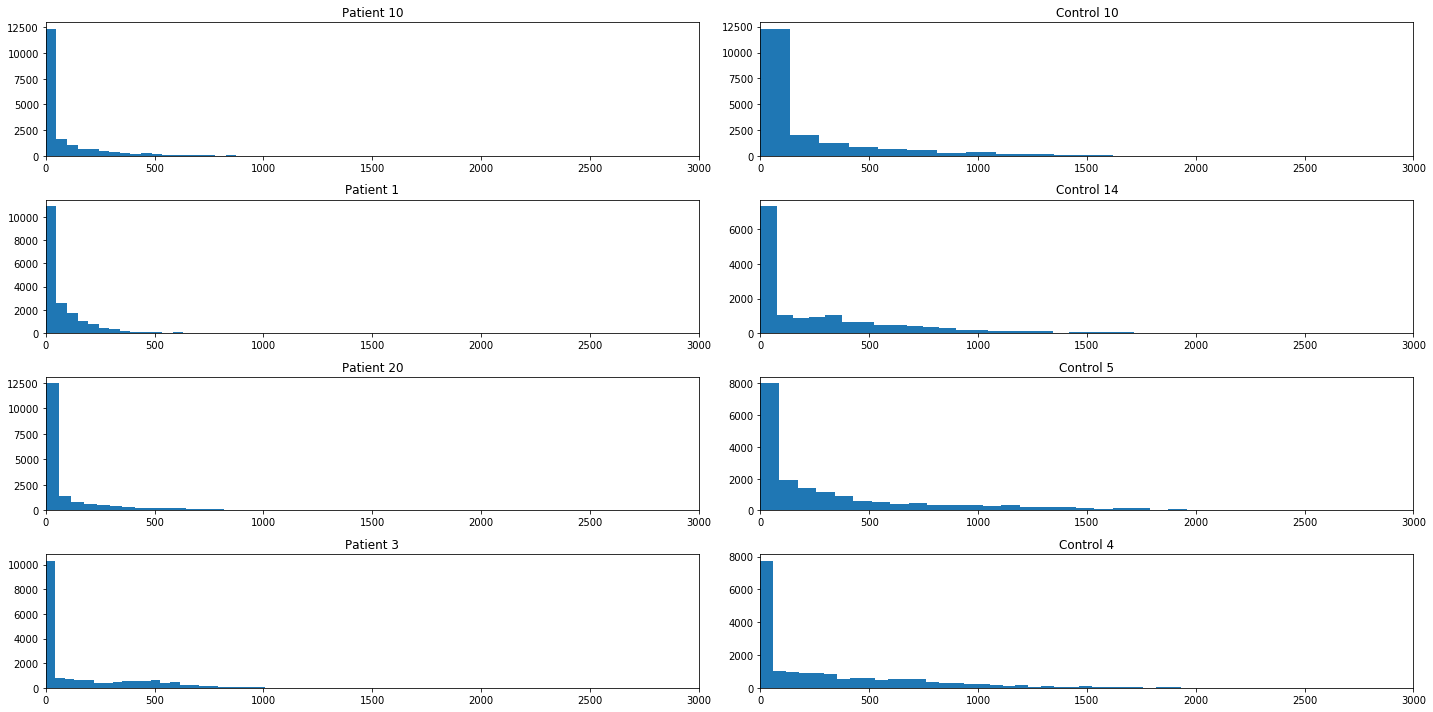

In [89]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.hist(shizophrenia_p[10], bins = 50)
ax0.set_title('Patient 10')
ax0.set_xlim([0,3000])
ax1.hist(shizophrenia_c[10], bins = 50)
ax1.set_title('Control 10')
ax1.set_xlim([0,3000])
ax2.hist(shizophrenia_p[1], bins = 50)
ax2.set_title('Patient 1')
ax2.set_xlim([0,3000])
ax3.hist(shizophrenia_c[14], bins = 50)
ax3.set_title('Control 14')
ax3.set_xlim([0,3000])
ax4.hist(shizophrenia_p[20], bins = 50)
ax4.set_title('Patient 20')
ax4.set_xlim([0,3000])
ax5.hist(shizophrenia_c[5], bins = 50)
ax5.set_title('Control 5')
ax5.set_xlim([0,3000])
ax6.hist(shizophrenia_p[3], bins = 50)
ax6.set_title('Patient 3')
ax6.set_xlim([0,3000])
ax7.hist(shizophrenia_c[4], bins = 50)
ax7.set_title('Control 4')
ax7.set_xlim([0,3000])
fig.tight_layout()


Figure 3 shows us histograms of the full time series of the patient group and control group. As expected there is a large amount of zero counts within the data. It is difficult to extract a given sample distribution out of these histograms. 
Galton Francis showed in his work: Natural Inheritance, that the normal distribution occurs in many phenomena in nature. (Wiki, source!)
A normal distribution can might be derived from transforming the data. To overcome the restriction of non-negativity, one can differenciate the time series by one. 
Differencing the time series by one will give us a slightly different interpretation of it. The differencing time series is no longer the measured activity per minute, but the change in activity compared to the last minute. The differencing is done by, 
$y_t' = y_t - y_{t-1}$. Positive values can be interpreted as a positive change in activity. The person has been less active before compared to now. On the other hand, a negative values indicates that the persons is less active now then before.

## Analysis of the sample distribution of the differentiated time series


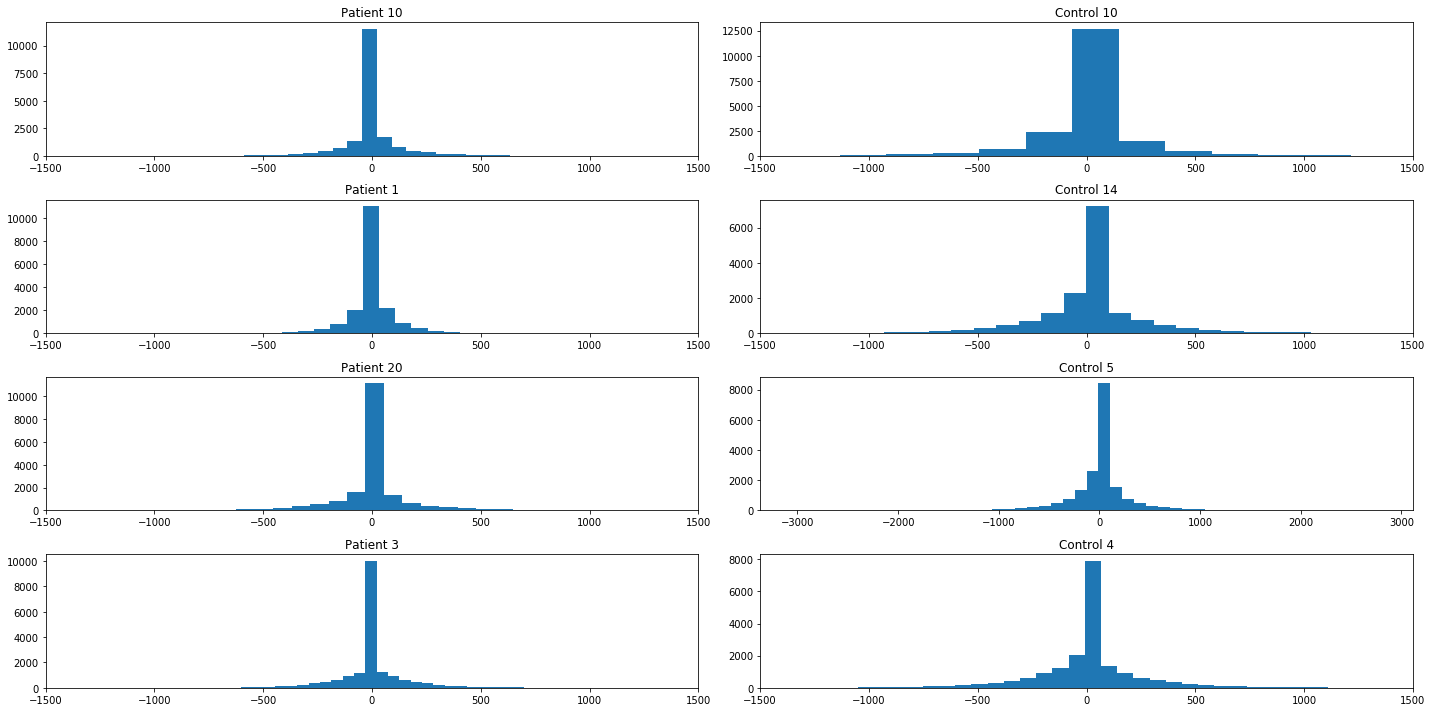

In [92]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.hist(shizophrenia_p[10].diff()[1:], bins = 50)
ax0.set_title('Patient 10')
ax0.set_xlim([-1500,1500])
ax1.hist(shizophrenia_c[10].diff()[1:], bins = 50)
ax1.set_title('Control 10')
ax1.set_xlim([-1500,1500])
ax2.hist(shizophrenia_p[1].diff()[1:], bins = 50)
ax2.set_title('Patient 1')
ax2.set_xlim([-1500,1500])
ax3.hist(shizophrenia_c[14].diff()[1:], bins = 50)
ax3.set_title('Control 14')
ax3.set_xlim([-1500,1500])
ax4.hist(shizophrenia_p[20].diff()[1:], bins = 50)
ax4.set_title('Patient 20')
ax4.set_xlim([-1500,1500])
ax5.hist(shizophrenia_c[5].diff()[1:], bins = 50)
ax5.set_title('Control 5')
ax6.set_xlim([-1500,1500])
ax6.hist(shizophrenia_p[3].diff()[1:], bins = 50)
ax6.set_title('Patient 3')
ax6.set_xlim([-1500,1500])
ax7.hist(shizophrenia_c[4].diff()[1:], bins = 50)
ax7.set_title('Control 4')
ax7.set_xlim([-1500,1500])
fig.tight_layout()

## Analysis of the log transformed sample distribution of the time series


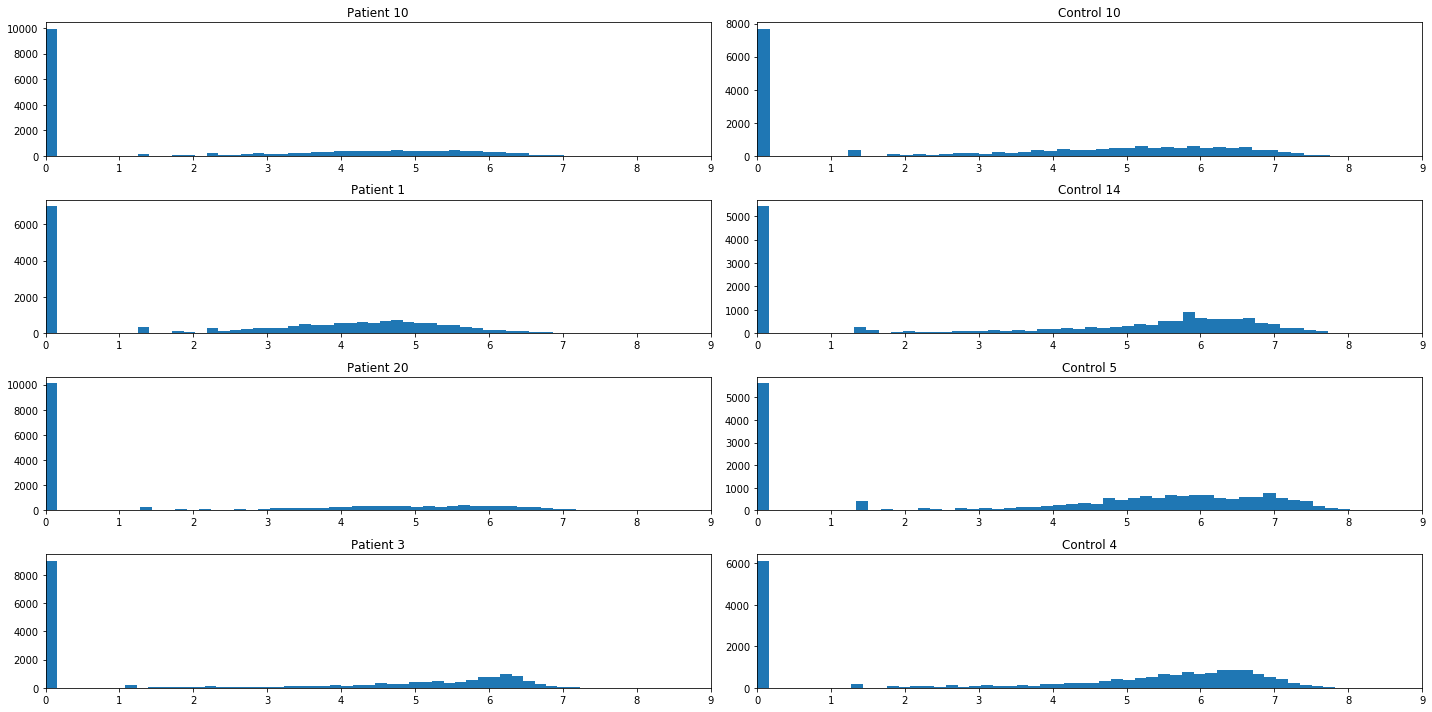

In [90]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5), (ax6,ax7)) = plt.subplots(4, 2, figsize=(20, 10))
ax0.hist(np.log(shizophrenia_p[10]+1), bins = 50)
ax0.set_title('Patient 10')
ax0.set_xlim([0,9])
ax1.hist(np.log(shizophrenia_c[10]+1), bins = 50)
ax1.set_title('Control 10')
ax1.set_xlim([0,9])
ax2.hist(np.log(shizophrenia_p[1]+1), bins = 50)
ax2.set_title('Patient 1')
ax2.set_xlim([0,9])
ax3.hist(np.log(shizophrenia_c[14]+1), bins = 50)
ax3.set_title('Control 14')
ax3.set_xlim([0,9])
ax4.hist(np.log(shizophrenia_p[20]+1), bins = 50)
ax4.set_title('Patient 20')
ax4.set_xlim([0,9])
ax5.hist(np.log(shizophrenia_c[5]+1), bins = 50)
ax5.set_title('Control 5')
ax5.set_xlim([0,9])
ax6.hist(np.log(shizophrenia_p[3]+1), bins = 50)
ax6.set_title('Patient 3')
ax6.set_xlim([0,9])
ax7.hist(np.log(shizophrenia_c[4]+1), bins = 50)
ax7.set_title('Control 4')
ax7.set_xlim([0,9])
fig.tight_layout()


## Key statements:
* Two different distributions 
* Zero inflated, need for a closer look at the resting period
* Active period looks somehow normal distributed but closer look needed too 
* Indicate the idea for two state model GMM, also through abrupt (regime)changes of the ts

#### Key statements: ?